In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Завантаження даних MNIST

In [3]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Визначення класу автокодувальника

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Ініціалізація моделі та втрати

In [5]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Навчання моделі

In [6]:
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/10], Loss: 0.0199
Epoch [2/10], Loss: 0.0142
Epoch [3/10], Loss: 0.0106
Epoch [4/10], Loss: 0.0082
Epoch [5/10], Loss: 0.0070
Epoch [6/10], Loss: 0.0075
Epoch [7/10], Loss: 0.0089
Epoch [8/10], Loss: 0.0074
Epoch [9/10], Loss: 0.0049
Epoch [10/10], Loss: 0.0063


Візуалізація результатів

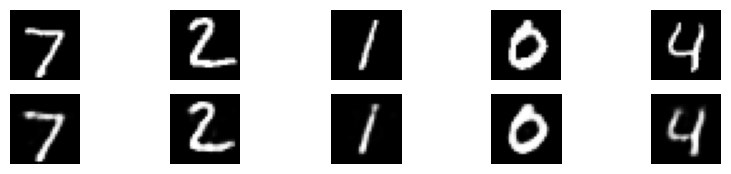

In [8]:
images, _ = next(iter(test_loader))
images = images.view(images.size(0), -1)
output = model(images)
output = output.view(output.size(0), 1, 28, 28)

plt.figure(figsize=(10, 2))
for i in range(5):
    # оригінальні зображення
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].view(28, 28).numpy(), cmap='gray')
    plt.axis('off')

    # відновлені зображення
    plt.subplot(2, 5, i + 6)
    plt.imshow(output[i].view(28, 28).detach().numpy(), cmap='gray')
    plt.axis('off')

plt.show()

Висновок: Під час цього проекту ми розробили автокодувальник на основі багатошарової нейронної мережі для датасету рукописних цифр MNIST.

Ми використали бібліотеку PyTorch для побудови моделі та навчання її на тренувальних даних. Модель складалася з енкодера та декодера, кожен з яких мав кілька шарів, з активацією ReLU та наступними повнозв'язними шарами. Ми використовували середньоквадратичну помилку (MSE) як функцію втрати та алгоритм оптимізації Adam для навчання моделі.

Після навчання ми використали модель для відновлення зображень з тестового набору даних та візуалізували як оригінальні, так і відновлені зображення. 